# Boltzmann Factor Demo

In [1]:
import numpy as np
import matplotlib.cm as cm

from LTEpy import lte, atom, plot
from LTEpy.constants import EVOLT

### Make a hydrogen atom
The energy levels and degeneracies are automatically calculated.
Default energy levels are 1 to 10.

In [2]:
hydrogen = atom.Hydrogen()
print(f"{hydrogen.levels=}")
print(f"{hydrogen.energy/EVOLT=}eV\n{hydrogen.gdegen=}")

hydrogen.levels=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
hydrogen.energy/EVOLT=array([-13.6       ,  -3.4       ,  -1.51111111,  -0.85      ,
        -0.544     ,  -0.37777778,  -0.27755102,  -0.2125    ,
        -0.16790123,  -0.136     ])eV
hydrogen.gdegen=array([  2,   8,  18,  32,  50,  72,  98, 128, 162, 200])


### Calculate Boltzmann Factor of all energy levels at a fixed temperature.

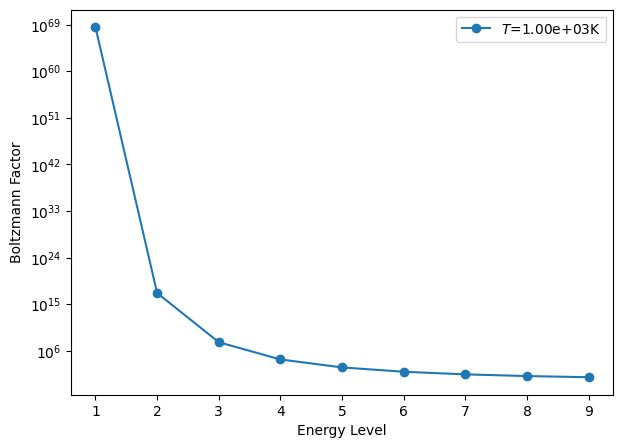

In [3]:
hbf = lte.Boltzmann_Factor(temp=10**3, #Kelvin
                           atom=hydrogen,)
bfact = hbf.bfact # this is how to get the Boltzmann factors
fig, hh = hbf.plot_bfact() # this is how to plot them
fig.axes[0].legend(handles=[hh,])

### Plot for many temperatures

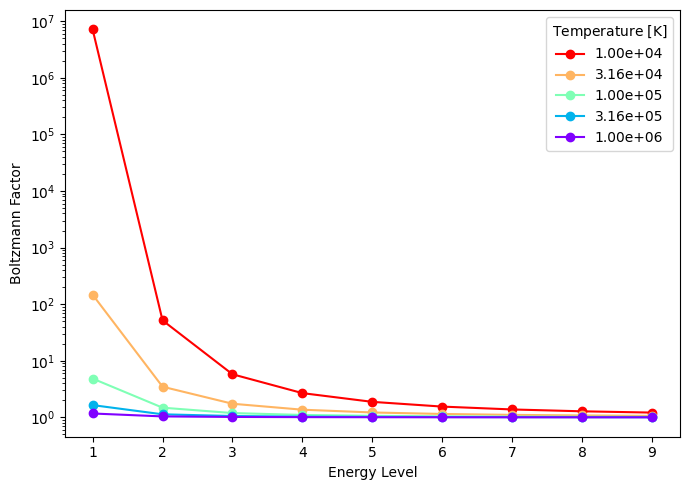

In [4]:
# setup temperatures and 1st Boltzmann_Factor object
temps = np.logspace(4,6,5)
hbf = lte.Boltzmann_Factor(temp=temps[0], atom=hydrogen,)

# set up figure
handles = []
labels = []
fig, ax = plot.figax(
    xlabel=plot.LABEL_LEVEL, ylabel=plot.LABEL_BFACT,
    xscale='linear')
colors = cm.rainbow_r(np.linspace(0,1,len(temps)))

# plot all Boltzmann factors
for ii, temp in enumerate(temps):

    # update temperature
    hbf.set_temp(temp=temp)
    # plot boltzmann factor
    hh = hbf.draw_bfact(ax, color=colors[ii])

    # append handles and labels for legend
    handles.append(hh)
    labels.append(f"{temp:.2e}")

# make legend
ax.legend(handles=handles, labels=labels, title=plot.LABEL_TEMP)
fig.tight_layout()

### Calculate and plot the partition function

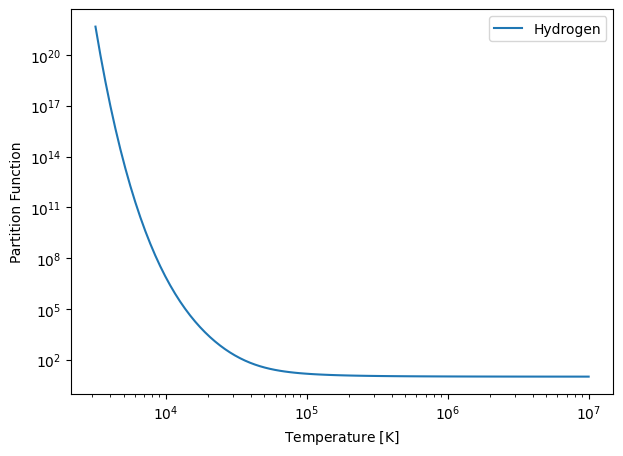

In [5]:
temps = np.logspace(3.5,7,100)  # Kelvin
pfact = np.zeros_like(temps)
hbf = lte.Boltzmann_Factor(temp=temps[0],  atom=hydrogen,)

# plot all Boltzmann factors
for ii, temp in enumerate(temps):

    # update temperature
    hbf.set_temp(temp=temp)
    # calculate Partition Function
    pfact[ii] = hbf.pfunc


fig, ax = plot.figax(xlabel=plot.LABEL_TEMP, ylabel='Partition Function',
                     )
ax.plot(temps, pfact, label='Hydrogen')
ax.legend(loc='upper right')